# Using the Variational Quantum Linear Solver

This notebook illustrates how to use the VQLS integrated in the library via our `vqls-protoype`.
We first need to sdefine the linear system:

$$A \cdot x = b$$

We use here a randon sparse matrix $A$ and a random right hand side vector $b$

In [1]:
from scipy.sparse import random as sprand
import numpy as np

size = 3
A = sprand(size, size, density=0.8, format="csr")
A = np.random.rand(size, size)
A = A + A.T
b = np.random.rand(size)

## Classical Solution
We can of course obtain the solution of this linear system using `numpy` 

In [2]:
ref = np.linalg.solve(A, b)

## VQLS Solution 
To use the VQLS solver we need to define a few primitives that are critical to its operation. Those are: a qiskit estimator, a variational ansatz and an optimizer.  All of those are predefined in qiskit and we cans imply leverage them

In [3]:
from qiskit.primitives import Estimator
from qiskit.circuit.library import RealAmplitudes
import qiskit_algorithms.optimizers as optim

estimator = Estimator()
ansatz = RealAmplitudes(2, reps=3)
optim = optim.CG()

We can now instantiate the solver and solve the linear ssytem

In [4]:
from quantum_newton_raphson.vqls_solver import VQLS_SOLVER

solver = VQLS_SOLVER(
    estimator=estimator,
    ansatz=ansatz,
    optimizer=optim,
    matrix_decomposition="symmetric",
)
sol = solver(A, b)

KeyboardInterrupt: 

## Visualize the solution
We can plot the evolution of the cost function using matplotlib

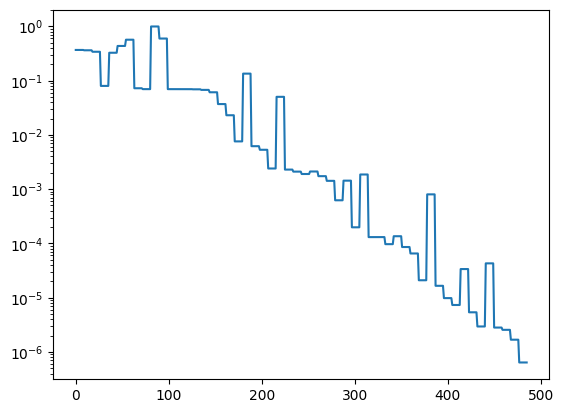

In [ ]:
import matplotlib.pyplot as plt

plt.semilogy(sol.logger.values)

And also verify the accuracy of the solution obtaind via the VQLS solver

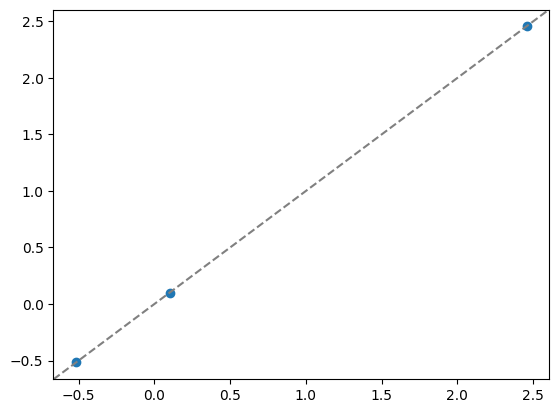

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(np.linalg.solve(A, b)[:3], sol.solution)
_ = plt.axline((0, 0), slope=1, linestyle="--", color="grey")

In [ ]:
A

array([[1.77129855, 1.93705091, 0.69490393],
       [1.93705091, 1.80853335, 0.41848396],
       [0.69490393, 0.41848396, 0.4334349 ]])

In [ ]:
b

array([0.98638303, 0.20808763, 0.74717062])

In [ ]:
def pad_input(A, y):
    """Process the input data to pad to power of two size.

    Args:
        A (np.ndarray): matrix of the linear system
        y (np.ndarray): rhs of the linear system
    """
    input_size = A.shape[0]
    if np.log2(input_size).is_integer():
        return A, y, input_size
    else:
        # new size
        new_size = 2 ** int(np.ceil(np.log2(input_size)))

        # pad matrix
        Afull = np.eye(new_size)
        Afull[:input_size, :input_size] = A

        # pad vector
        yfull = np.zeros(new_size)
        yfull[:input_size] = y
        return Afull, yfull, input_size


Af, bf, _ = pad_input(A, b)

In [ ]:
Af

array([[1.77129855, 1.93705091, 0.69490393, 0.        ],
       [1.93705091, 1.80853335, 0.41848396, 0.        ],
       [0.69490393, 0.41848396, 0.4334349 , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [ ]:
bf

array([0.98638303, 0.20808763, 0.74717062, 0.        ])

In [ ]:
np.li

AttributeError: module 'numpy' has no attribute 'li'